# THE MIND CHALLENGE

### **Group 5**

## Part I: HubSpotScore Reverse Engineering




*Exploratory Data Anlaysis*

In [1]:
#import library
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
pwd

'C:\\Users\\mgarc\\Mind Challenge'

In [4]:
#load dataset

df =  pd.read_csv("hubspotscoredep.csv")
df.head()

,Unnamed: 0,HashPersonId,HashHubSpotId,Age,Gender,PrimaryNationality,HomeCountry,MktCountry,MktGeographicalArea,MktProvince,...,FirstMktEmailClickDate,LastMktEmailSendDate,LastMktEmailClickDate,NumClickedMktEmails,AveragePageViews,FirstURLSeen,FirstReferringSite,NumEventCompletions,FirstPageViewTime,LastPageViewTime
0,0,083d01c4b22ee9a0bede906b3b231e5e1733484e,61a446a807bfb857661e81dd769b958357d88cf8,36.0,Female,TURKISH,NaN,Luxembourg,Europe,NaN,...,NaN,2021-12-02 13:34:51,NaN,NaN,13.0,https://www.ie.edu/business-school/programs/mba/,https://www.google.com,0.0,2021-01-23 13:58:43,2021-01-23 14:12:14
1,1,df0259c919f747e982708d8d1b595968f6bf3922,09304c43fc7d84ebb2e506b4385d79960d3de289,18.0,Male,CANADIAN,NaN,Bangladesh,Asia Pacific,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,2021-01-23 18:15:55,NaN
2,2,65e64a6f95ddba1cf0a84330c768b1077d475281,1ae1b7eb8da9c788f365219b83a007bf297736ba,18.0,Female,SPANISH,NaN,Spain,Spain,Barcelona,...,NaN,2021-10-11 12:09:15,NaN,NaN,0.0,NaN,NaN,0.0,2021-01-24 14:42:25,NaN
3,3,8d9e8fdf227444a643c9204017854c66b6fec9db,e9d64c24b6eadeaf5789e695c6b15ffe667a0489,20.0,Female,BULGARIAN,NaN,Bulgaria,Europe,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,2021-01-24 14:46:28,NaN
4,4,9d3cd93e307f010896bccbc61afd9972a5810ed8,a9a78d6c19e6a22b35d8eb501a15b21de7beeafd,19.0,Male,AUSTRALIAN,NaN,Australia,Asia Pacific,Western Australia,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,2021-01-25 09:54:48,NaN


Let’s have a look at data dimensionality, feature names, and feature types.

In [5]:
print(df.shape)

(262356, 44)


From the output, we can see that the table contains 262356 rows and 44 columns.

Now let’s try printing out column names using `columns`:

In [6]:
print(df.columns)

Index(['Unnamed: 0', 'HashPersonId', 'HashHubSpotId', 'Age', 'Gender',
       'PrimaryNationality', 'HomeCountry', 'MktCountry',
       'MktGeographicalArea', 'MktProvince', 'MktCity',
       'CommunicationLanguage', 'CommercialRegion', 'Center',
       'CommercialBusinessUnit', 'HashEducationId', 'Title', 'EducationLevel',
       'AcademicDiscipline', 'College', 'Institution', 'AverageGrade',
       'HashProfExperienceId', 'Position', 'MainPosition', 'CurrentPosition',
       'Sector', 'Area', 'LeadQuality', 'HashEmailAddress', 'HubSpotScore',
       'NumSalesActivities', 'NumTimesContacted', 'FirstMktEmailSendDate',
       'FirstMktEmailClickDate', 'LastMktEmailSendDate',
       'LastMktEmailClickDate', 'NumClickedMktEmails', 'AveragePageViews',
       'FirstURLSeen', 'FirstReferringSite', 'NumEventCompletions',
       'FirstPageViewTime', 'LastPageViewTime'],
      dtype='object')


We can use the info() method to output some general information about the dataframe:

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262356 entries, 0 to 262355
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              262356 non-null  int64  
 1   HashPersonId            262356 non-null  object 
 2   HashHubSpotId           262356 non-null  object 
 3   Age                     259578 non-null  float64
 4   Gender                  262350 non-null  object 
 5   PrimaryNationality      249377 non-null  object 
 6   HomeCountry             84120 non-null   object 
 7   MktCountry              262138 non-null  object 
 8   MktGeographicalArea     261135 non-null  object 
 9   MktProvince             133450 non-null  object 
 10  MktCity                 248587 non-null  object 
 11  CommunicationLanguage   262312 non-null  object 
 12  CommercialRegion        261686 non-null  object 
 13  Center                  261686 non-null  object 
 14  CommercialBusinessUn

From here we decided to drop some variables we believe are not necessary for hub spot socre prediction. Concrete we decided to drop the following columns:

* HashPersonId
* HashHubSpotId
* HashEducationId                    
* HashEmailAddress     
* FirstMktEmailSendDate  
* FirstMktEmailClickDate  
* LastMktEmailSendDate    
* LastMktEmailClickDate  
* FirstPageViewTime      
* LastPageViewTime         


In [8]:
df.drop(["HashHubSpotId", "HashEducationId", "HashEmailAddress", "FirstMktEmailSendDate","HashProfExperienceId", 
         "FirstMktEmailClickDate","LastMktEmailSendDate","LastMktEmailClickDate","FirstPageViewTime","LastPageViewTime"], axis=1, inplace=True)


We remove duplicates created when joining the datasets

In [10]:
df = df.drop_duplicates(subset='HashPersonId', keep='first', inplace=False, ignore_index=False)

In [11]:
df.shape

(88699, 34)

Now let's take again a look at the variables

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88699 entries, 0 to 262355
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              88699 non-null  int64  
 1   HashPersonId            88699 non-null  object 
 2   Age                     86124 non-null  float64
 3   Gender                  88693 non-null  object 
 4   PrimaryNationality      77328 non-null  object 
 5   HomeCountry             18537 non-null  object 
 6   MktCountry              88649 non-null  object 
 7   MktGeographicalArea     88464 non-null  object 
 8   MktProvince             42262 non-null  object 
 9   MktCity                 82316 non-null  object 
 10  CommunicationLanguage   88659 non-null  object 
 11  CommercialRegion        88545 non-null  object 
 12  Center                  88545 non-null  object 
 13  CommercialBusinessUnit  88545 non-null  object 
 14  Title                   46673 non-nul

From here we can see that there are 8 numerical variables:

* ID
* Age
* HubSpotScore
* NumSalesActivities
* NumTimesContacted
* NumClickedMktEmails
* AveragePageViews
* NumEventCompletions

And 24 categorical variables:

* Gender
* PrimaryNationality
* Home Country
* MktCountry
* MktGeographicalArea
* MktProvince 
* MktCity
* ComunicationLanguage
* CommercialRegion
* Center
* CommercialBusinessUnit        
* Title                  
* EducationLevel         
* AcademicDiscipline      
* College                  
* Institution             
* AverageGrade               
* Position                
* MainPosition           
* CurrentPosition          
* Sector                  
* Area                    
* LeadQuality              

**Numerical varibles**

In [13]:
df.describe()

,Unnamed: 0,Age,HubSpotScore,NumSalesActivities,NumTimesContacted,NumClickedMktEmails,AveragePageViews,NumEventCompletions
count,88699.000000,86124.000000,86251.000000,71302.000000,71302.000000,32286.000000,86251.000000,86251.000000
mean,44349.000000,27.364695,-8.626532,17.064023,12.066969,2.403828,2.210154,5.948511
std,25605.340101,8.928301,36.531775,22.055201,14.928277,2.294629,3.318758,31.840547
min,0.000000,0.000000,-186.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,22174.500000,21.000000,-30.000000,4.000000,3.000000,1.000000,0.000000,0.000000
50%,44349.000000,25.000000,0.000000,9.000000,7.000000,2.000000,1.000000,0.000000
75%,66523.500000,32.000000,13.000000,22.000000,16.000000,3.000000,3.000000,0.000000
max,88698.000000,122.000000,166.000000,1263.000000,516.000000,47.000000,71.000000,1093.000000


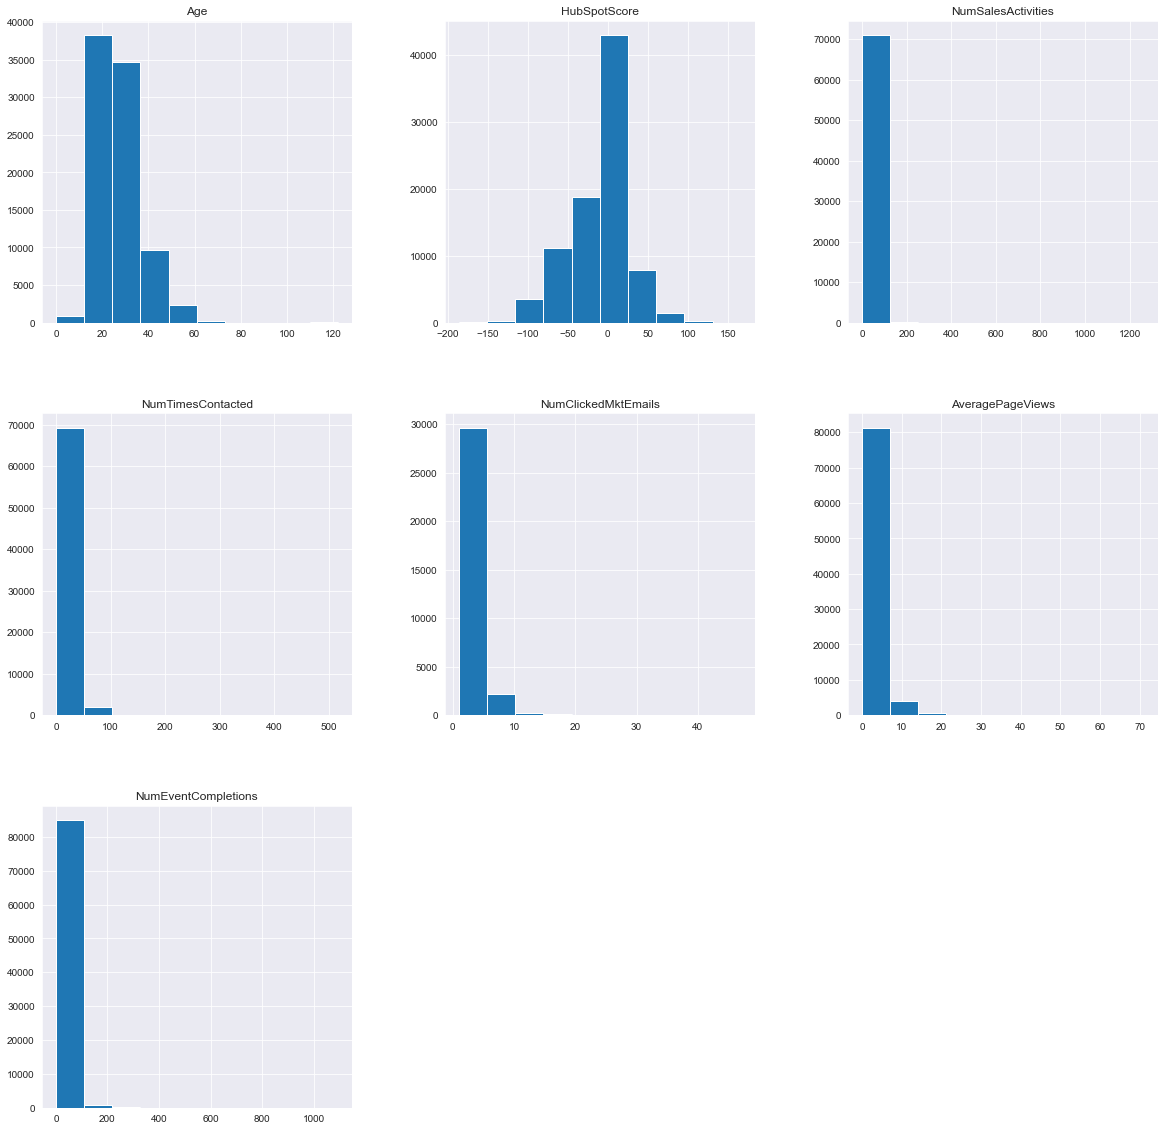

In [14]:
features = ["Age", "HubSpotScore","NumSalesActivities","NumTimesContacted","NumClickedMktEmails","AveragePageViews","NumEventCompletions"]
df[features].hist(figsize=(20, 20));

From these graphs we can see that in 5 of the 7 variables, outliers seem to be a problem, we will have to address them in the future

Let's take a special look into the dependent variable

RuntimeError: The data contains non-finite values.

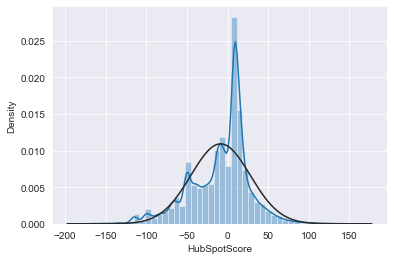

In [15]:
# Your code here
sns.distplot(df['HubSpotScore'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['HubSpotScore'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Hubspot score distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['HubSpotScore'], plot=plt)
plt.show()

Suprisingly we can identify a distribution that aproaches a normal one, which will help us a lot when building the model

In [16]:
data = df

**Categorical variables**

In [17]:
len(data['Title'].unique())

17883

In [18]:
data["Title"].value_counts(normalize=True)

IB Diploma + UNED Credential                                            0.049858
Baccalaureate Diploma (France)                                          0.021533
Bachelor                                                                0.021104
Spanish Baccalaureate + PAU                                             0.018705
Bachelor of Science                                                     0.018533
                                                                          ...   
Rebeca Rodriguez                                                        0.000021
Ib DIploma                                                              0.000021
12th Grade - CBSE                                                       0.000021
Associate of Arts in Communication Studies                              0.000021
Diploma de estudios Avanzados en Ingenieria de Sistemas y Automatica    0.000021
Name: Title, Length: 17882, dtype: float64

In [19]:
data['EducationLevel'].unique()

array([nan, '5. Secondary education',
       '4. Bachelor degree/Undergraduate Studies', '2. Master',
       '6. Others', '3. Certificate programs/Executive Education ',
       '1. PhD/Doctorate', 'Primary Education'], dtype=object)

In [20]:
data["EducationLevel"].value_counts(normalize=True)

4. Bachelor degree/Undergraduate Studies        0.318141
5. Secondary education                          0.315036
2. Master                                       0.156483
3. Certificate programs/Executive Education     0.145811
6. Others                                       0.054676
Primary Education                               0.005563
1. PhD/Doctorate                                0.004290
Name: EducationLevel, dtype: float64

In [21]:
data["AcademicDiscipline"].value_counts(normalize=True)

Business           0.292624
Others             0.178483
Engineering        0.134982
Economics          0.097228
Legal              0.081418
Social Sciences    0.080087
Science            0.060706
Humanities         0.043955
Technology         0.030516
Name: AcademicDiscipline, dtype: float64

In [22]:
data["College"].value_counts(normalize=True)

Colegio no validado                     0.239748
Unvalidated school                      0.024408
Engineering                             0.007721
Business School                         0.006778
Business                                0.006349
                                          ...   
Clonlara School                         0.000043
Wharton                                 0.000043
Estadistica                             0.000043
Maharana Pratap School of Technology    0.000043
Secundaria                              0.000043
Name: College, Length: 11413, dtype: float64

In [23]:
data["Institution"].value_counts(normalize=True)

American University of Beirut                   0.008168
IE University                                   0.007169
Lebanese American University                    0.005994
Bocconi University                              0.005729
Universidad de los Andes                        0.005582
                                                  ...   
National Research Nuclear University (MEPHI)    0.000029
Mary Mount International School of Rome         0.000029
Gargi College                                   0.000029
Maristas                                        0.000029
Agora Portals International School              0.000029
Name: Institution, Length: 15322, dtype: float64

In [24]:
data["Position"].value_counts(normalize=True)

Employee                       0.658060
Middle Management              0.178919
Senior Management              0.075869
Senior Executive Management    0.063622
Entrepreneur                   0.023531
Name: Position, dtype: float64

In [25]:
data["MainPosition"].value_counts(normalize=True)

No     0.993376
Yes    0.006624
Name: MainPosition, dtype: float64

In [26]:
data["CurrentPosition"].value_counts(normalize=True)

No     0.625472
Yes    0.374528
Name: CurrentPosition, dtype: float64

In [27]:
data["Sector"].value_counts(normalize=True)

Banking / Insurance / Financial Services     0.125731
Other                                        0.080436
Technology / Telecommunications              0.073289
Consumer Products & Retail                   0.068768
Consulting                                   0.065465
Education                                    0.060510
Government / NGO                             0.054283
Real estate / Construction                   0.051522
Legal Services                               0.049329
Marketing / Advertisement / Communication    0.043941
Healthcare / Pharma / Biotechnology          0.042641
Chemical / Energy & Utilities                0.042425
Tourism & Hospitality                        0.036820
Industrial Products                          0.029700
Media / Entertainment                        0.026478
Fashion                                      0.022932
Transport / Logistics                        0.020657
Architecture / Urbanism                      0.020089
Automotive                  

In [28]:
data["Area"].value_counts(normalize=True)

Accounting / Finance                 0.105632
Other                                0.100928
Marketing / Communication            0.093795
Sales & Customer Services            0.078531
Consulting                           0.065759
Legal Dpt.                           0.060682
Business Development                 0.054545
Information Systems & Technology     0.039935
General Management                   0.038814
Project Management                   0.038751
Operations & Logistics               0.036758
Family Business                      0.030123
Professional Services                0.029842
Academic                             0.029095
Entrepreneur                         0.024734
Architecture & Design                0.023799
Strategy & Leadership                0.021089
Human Resources                      0.020933
General Services/ Administration     0.017943
R&D                                  0.014610
Digital transformation / Big Data    0.014516
Innovation & ICT                  

In [29]:
data["LeadQuality"].value_counts(normalize=True)

Negativo     0.557573
Medio        0.291941
Bueno        0.114891
Muy bueno    0.033601
Excelente    0.001994
Name: LeadQuality, dtype: float64

In [30]:
data["AverageGrade"].value_counts(normalize=True)

7/10         0.033703
8/10         0.025093
9/10         0.010469
6/10         0.010332
10/10        0.008856
               ...   
4.57/5.00    0.000027
4/           0.000027
2.93/5       0.000027
3.83/4.3     0.000027
3.79/5.0     0.000027
Name: AverageGrade, Length: 10083, dtype: float64

In [31]:
data['Gender'].value_counts(normalize=True)

Male      0.542027
Female    0.457973
Name: Gender, dtype: float64

In [32]:
data['PrimaryNationality'].value_counts(normalize=True)

SPANISH             0.206031
INDIAN              0.068656
AMERICAN            0.066974
FRENCH              0.049891
ITALIAN             0.047706
                      ...   
TIMORESE            0.000013
PALAUAN             0.000013
SOLOMON ISLANDER    0.000013
VATICAN             0.000013
BISSAU-GUINEAN      0.000013
Name: PrimaryNationality, Length: 196, dtype: float64

In [33]:
data['HomeCountry'].value_counts(normalize=True)

Spain                       0.259751
United States Of America    0.090845
Colombia                    0.041269
India                       0.038841
France                      0.037870
                              ...   
Togo                        0.000054
Bosnia And Herzegovina      0.000054
Antigua And Barbuda         0.000054
Yemen                       0.000054
Sudan                       0.000054
Name: HomeCountry, Length: 160, dtype: float64

In [34]:
data['MktCountry'].value_counts(normalize=True)

Spain                                       0.199438
United States Of America                    0.077192
India                                       0.061084
France                                      0.035206
Mexico                                      0.034078
                                              ...   
Northern Mariana Islands                    0.000011
Saint Kitts and Nevis                       0.000011
South Georgia And South Sandwich Islands    0.000011
Solomon Islands                             0.000011
Vatican City                                0.000011
Name: MktCountry, Length: 216, dtype: float64

In [35]:
data['MktGeographicalArea'].value_counts(normalize=True)

Europe                          0.223096
Spain                           0.197301
Latin America                   0.181283
Asia Pacific                    0.124005
North America                   0.094694
Africa                          0.086792
Middle East                     0.073024
Europe-cis                      0.018414
Middle East And North Africa    0.001390
Name: MktGeographicalArea, dtype: float64

In [36]:
data['MktProvince'].value_counts(normalize=True)

Madrid                  0.261109
London                  0.035469
Milano                  0.029388
Maharashtra             0.026738
Barcelona               0.025862
                          ...   
Rieti                   0.000024
Dadra & Nagar Haveli    0.000024
Verbano-Cusio-Ossola    0.000024
Caltanissetta           0.000024
Isle of Man             0.000024
Name: MktProvince, Length: 376, dtype: float64

In [37]:
data['MktCity'].value_counts(normalize=True)

Madrid          0.088197
Lima            0.017919
Paris           0.015319
London          0.014262
Dubai           0.011978
                  ...   
Beit Shemesh    0.000012
haryana         0.000012
Sokcho          0.000012
San Leandro     0.000012
Corralejo       0.000012
Name: MktCity, Length: 14042, dtype: float64

In [38]:
data['CommunicationLanguage'].value_counts(normalize=True)

English      0.894935
Spanish      0.105054
Bilingual    0.000011
Name: CommunicationLanguage, dtype: float64

In [190]:
data['CommercialRegion'].value_counts(normalize=True)

Europe                  0.241312
Spain                   0.199040
Latin America           0.180236
Middle East & Africa    0.160766
Asia-Pacific            0.124332
North America           0.094314
Name: CommercialRegion, dtype: float64

In [191]:
data['Center'].value_counts(normalize=True)

Centro Spain           0.199040
Centro Middle East     0.081902
Centro Africa          0.078864
Centro India           0.064747
Centro Bogotá          0.061652
Centro DACH            0.048281
Centro Italy           0.037823
Centro Francia         0.035699
Centro UK              0.034288
Centro Mexico          0.033700
Centro New York        0.031058
Centro Perú            0.028810
Centro Miami           0.026732
Centro Los Angeles     0.023717
Centro Benelux         0.019820
Centro Russia          0.018104
Centro Singapore       0.017686
Centro China           0.016432
Centro Brazil          0.013744
Centro Portugal        0.013406
Centro Canada          0.012807
Centro Ecuador         0.011678
Centro Argentina       0.011542
Centro Europa          0.011328
Centro Turkey          0.010842
Centro Chile           0.010447
Centro Asia Pacific    0.010300
Centro Nórdico         0.009453
Centro Venezuela       0.008662
Centro Japan           0.005760
Centro Korea           0.003343
Centro A

In [192]:
data['CommercialBusinessUnit'].value_counts(normalize=True)

IE - España                 0.199040
IE - India                  0.064747
IE - Colombia               0.061652
IE - DACH                   0.048281
IE - Middle East & Egypt    0.042634
IE - Italy                  0.037823
IE - France                 0.035699
IE - UK                     0.034288
IE - Mexico                 0.033700
IE - New York               0.031058
IE - Peru                   0.028810
IE - Miami                  0.026732
IE - Dubai                  0.024089
IE - Los Angeles            0.023717
IE - West Africa            0.022429
IE - Central-East Africa    0.021695
IE - North Africa           0.021605
IE - Benelux                0.019820
IE - RussiaCIS              0.018104
IE - Singapore              0.017686
IE - Saudi                  0.015179
IE - Brazil                 0.013744
IE - Portugal               0.013406
IE - South Africa           0.013135
IE - Canada                 0.012807
IE - Ecuador                0.011678
IE - Argentina              0.011542
I

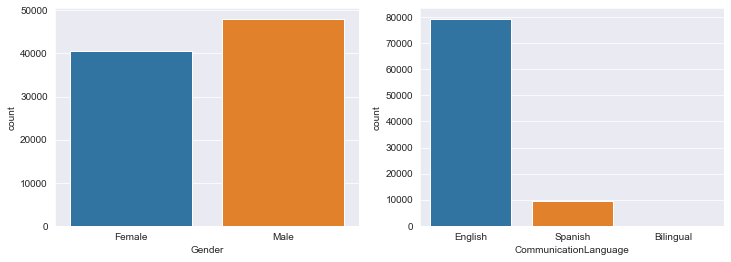

In [39]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Gender", data=df, ax=axes[0])
sns.countplot(x="CommunicationLanguage", data=df, ax=axes[1]);

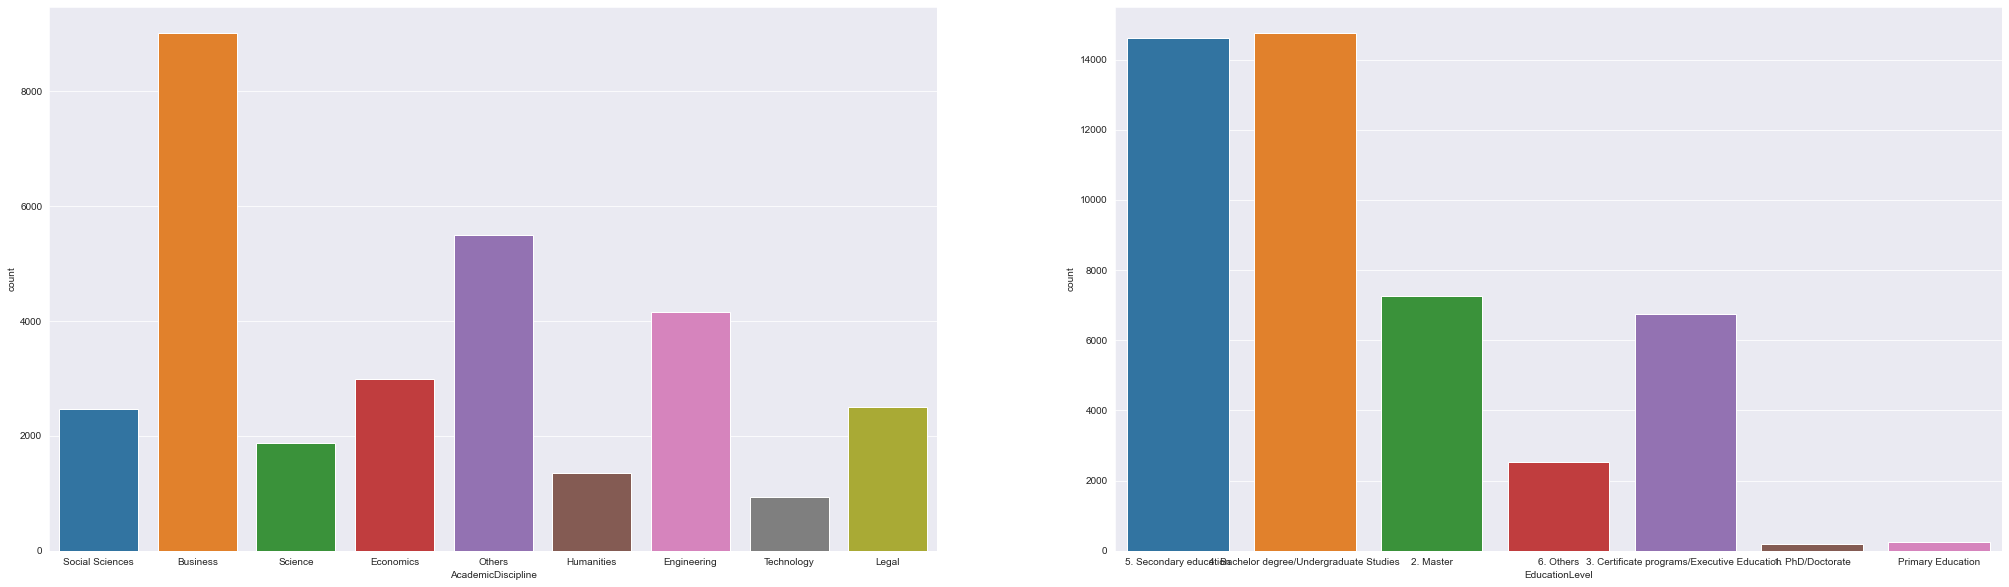

In [40]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(35, 10))

sns.countplot(x="AcademicDiscipline", data=df, ax=axes[0])
sns.countplot(x="EducationLevel", data=df, ax=axes[1]);

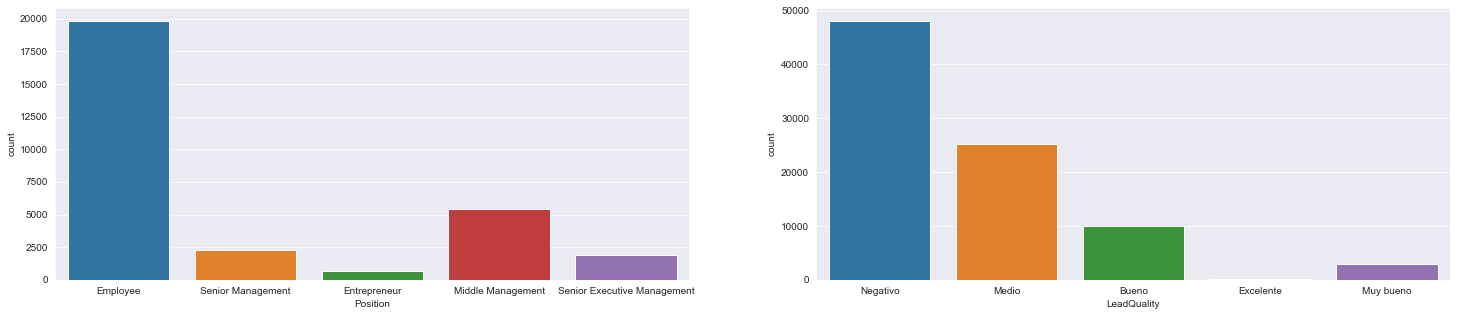

In [195]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))

sns.countplot(x="Position", data=df, ax=axes[0])
sns.countplot(x="LeadQuality", data=df, ax=axes[1]);

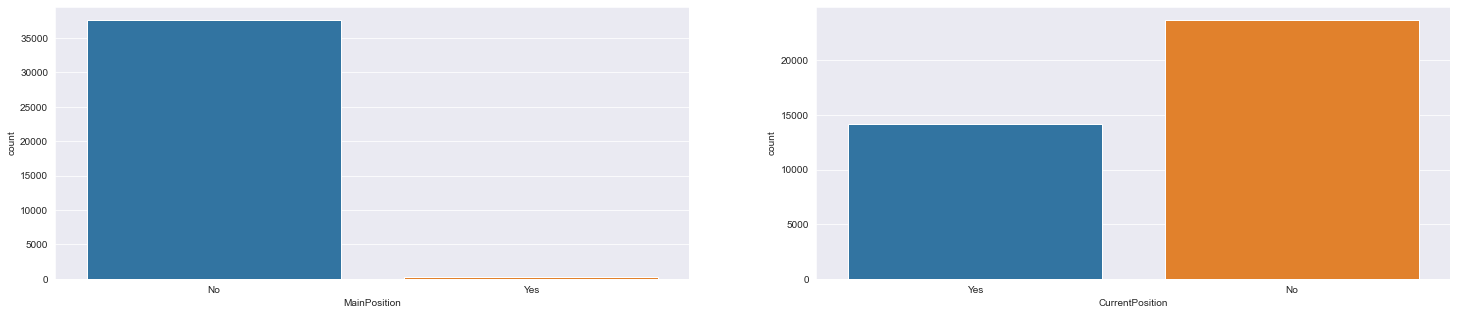

In [196]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))

sns.countplot(x="MainPosition", data=df, ax=axes[0])
sns.countplot(x="CurrentPosition", data=df, ax=axes[1]);

### MULTIVARIATE ANALYSIS

**Numerical Variables**

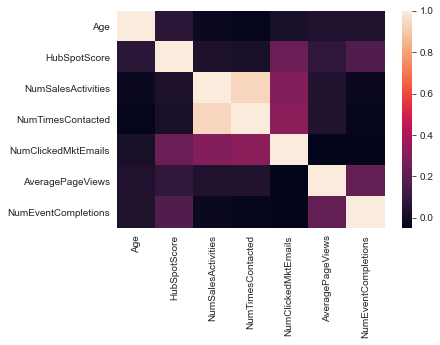

In [197]:

features = ["Age", "HubSpotScore","NumSalesActivities","NumTimesContacted","NumClickedMktEmails","AveragePageViews","NumEventCompletions"]
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix,);

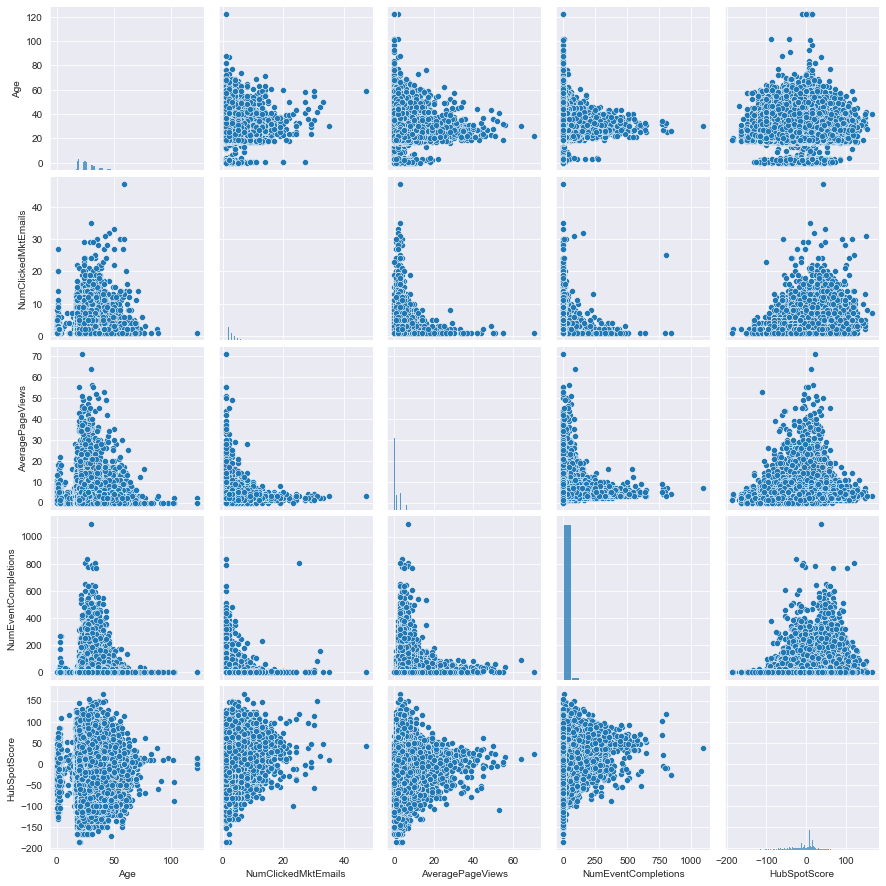

In [47]:
features  = ["Age","NumClickedMktEmails","AveragePageViews","NumEventCompletions","HubSpotScore"]

%config InlineBackend.figure_format = 'png'
sns.pairplot(df[features]);

And 24 categorical variables:

Gender

PrimaryNationality

Home Country

MktCountry

MktGeographicalArea

MktProvince

MktCity

ComunicationLanguage

CommercialRegion

Center

CommercialBusinessUnit

Title

EducationLevel

AcademicDiscipline

College

Institution

AverageGrade

Position

MainPosition

CurrentPosition

Sector

Area

LeadQuality

In [199]:
data['Position'].unique()

array([nan, 'Employee', 'Senior Management', 'Entrepreneur',
       'Middle Management', 'Senior Executive Management'], dtype=object)

In [200]:
data.columns

Index(['Unnamed: 0', 'HashPersonId', 'Age', 'Gender', 'PrimaryNationality',
       'HomeCountry', 'MktCountry', 'MktGeographicalArea', 'MktProvince',
       'MktCity', 'CommunicationLanguage', 'CommercialRegion', 'Center',
       'CommercialBusinessUnit', 'Title', 'EducationLevel',
       'AcademicDiscipline', 'College', 'Institution', 'AverageGrade',
       'Position', 'MainPosition', 'CurrentPosition', 'Sector', 'Area',
       'LeadQuality', 'HubSpotScore', 'NumSalesActivities',
       'NumTimesContacted', 'NumClickedMktEmails', 'AveragePageViews',
       'FirstURLSeen', 'FirstReferringSite', 'NumEventCompletions'],
      dtype='object')

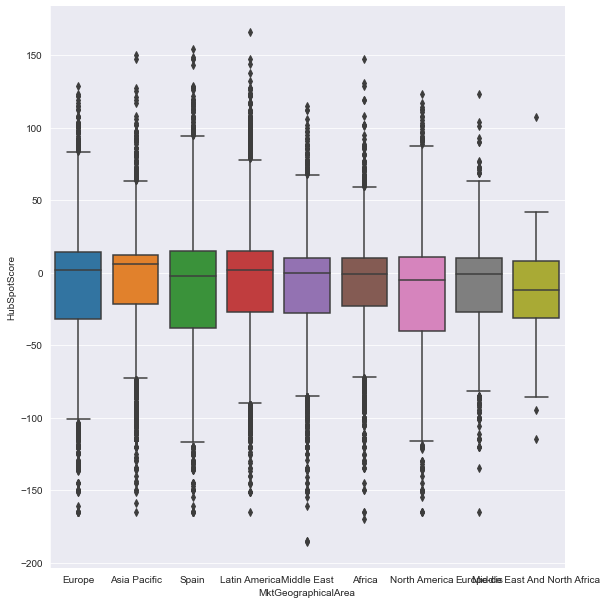

In [46]:
sns.catplot(x="MktGeographicalArea", y="HubSpotScore", kind="box", data=data, height = 8.5)

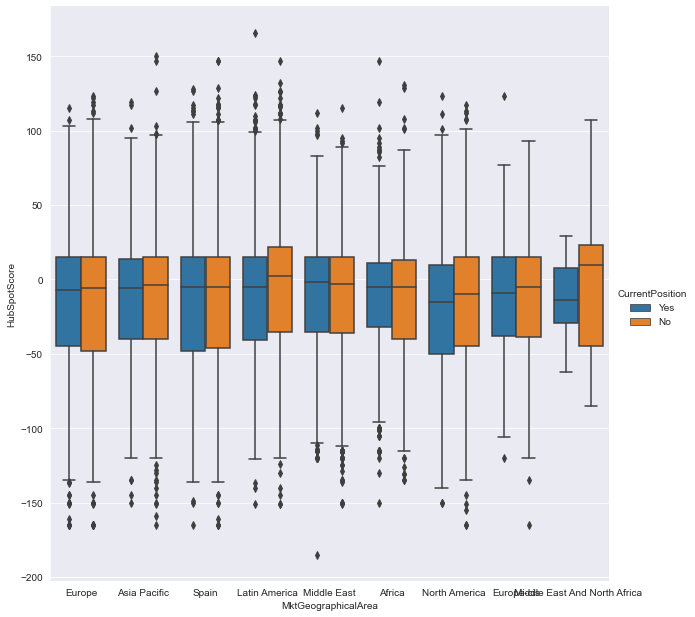

In [222]:
sns.catplot(x="MktGeographicalArea", y="HubSpotScore", hue = 'CurrentPosition', kind="box", data=data, height = 8.5)

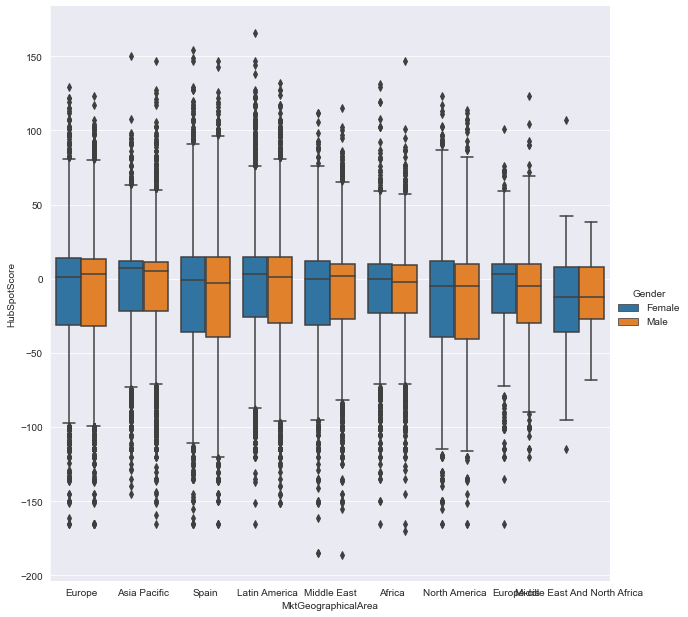

In [219]:
sns.catplot(x="MktGeographicalArea", y="HubSpotScore", kind="box", hue='Gender', data=data, height = 8.5)

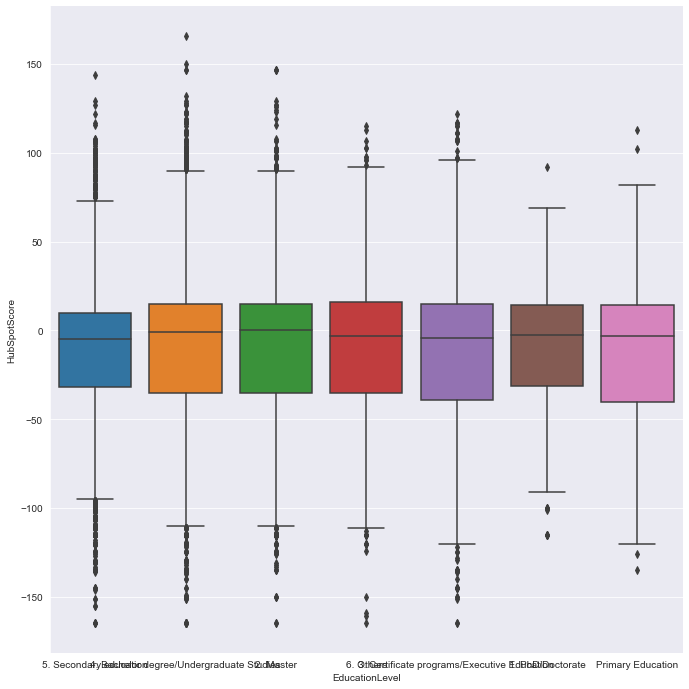

In [206]:
sns.catplot(x="EducationLevel", y="HubSpotScore", kind="box", data=data, height =9.5)

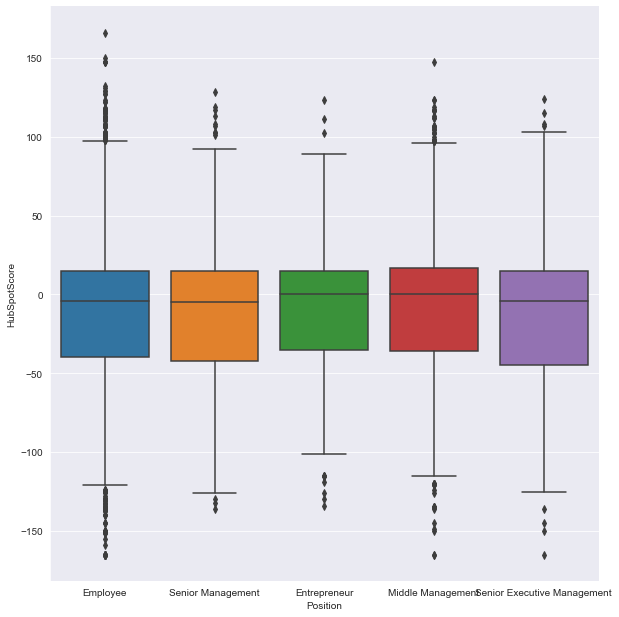

In [210]:
sns.catplot(x="Position", y="HubSpotScore", kind="box", data=df, height = 8.5)

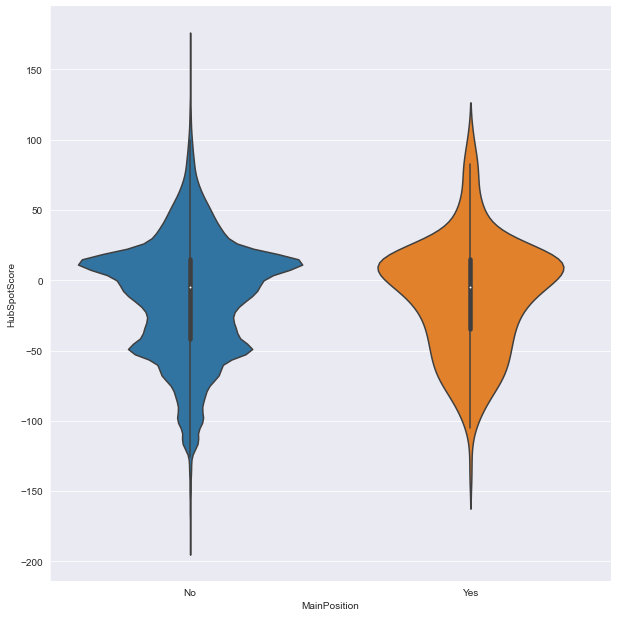

In [224]:
sns.catplot(x="MainPosition", y="HubSpotScore", kind="violin", data=df, height = 8.5)